/tmp/ipython-input-3646756977.py:121: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


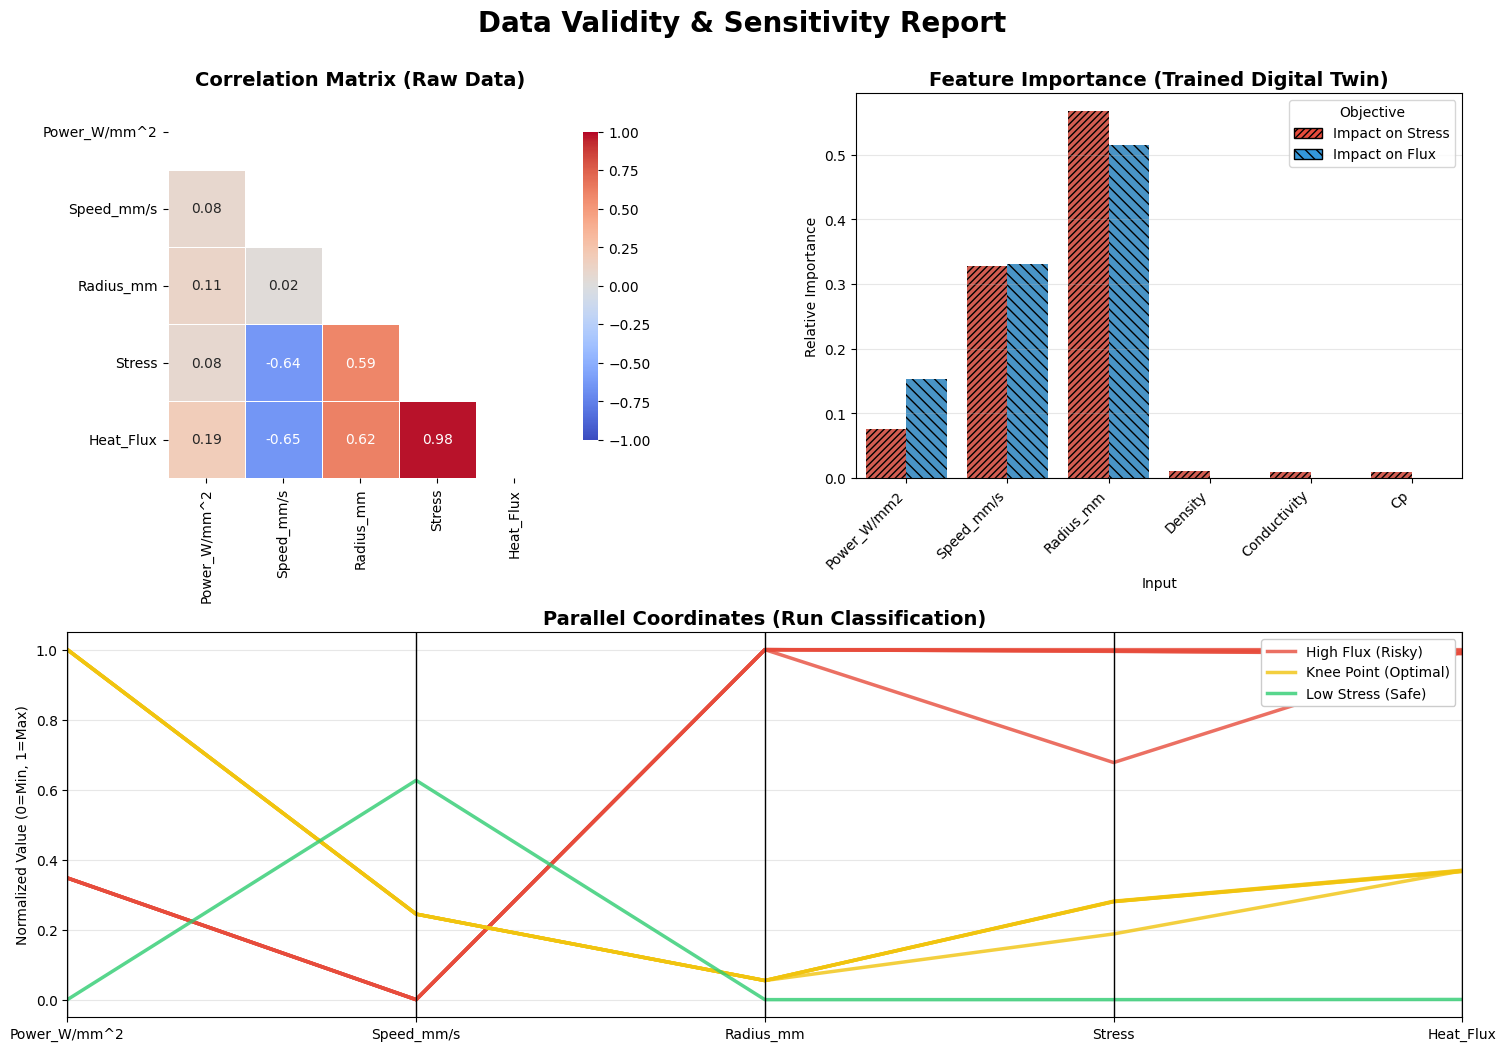

In [6]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from pandas.plotting import parallel_coordinates

# ==========================================
# 1. DATA LOADING (Raw Experimental Data)
# ==========================================
# We keep this to audit the INPUT data quality.
csv_content = """Run,Material,Power_W/mm^2,Speed_mm/s,Radius_mm,Y1_Max_Prin_Stress (MPa),Y2_Max_Von_Mises,Y3_Deformation mm,Max Temp,Heat flux
1,CoCrFeNiMn ,137.27,5.31,1.44,355.95,1360.2,0.0172,255.24,0.4193
2,CoCrFeNiMn ,260.59,39.51,1.11,43.22,215.36,0.0027,58.48,0.0933
3,CoCrFeNiMn ,183.35,21.1,1.22,70.385,339.24,0.0042,79.584,0.1412
4,CoCrFeNiMn ,56.31,32.79,0.89,7.3,36.37,0.0005,28.17,0.0158
5,CoCrFeNiMn ,86.3,22.69,1.06,22.986,112.5,0.0014,41.09,0.0474
6,CoCrFeNiMn ,217.8,33.32,1.4,67.52,336.46,0.0042,78.97,0.1449
7,CoCrFeNiMn ,289.23,16.03,0.92,86.55,403.25,0.005,90.65,0.1651
8,CoCrFeNiMn ,169.14,49.17,1.27,29.557,147.42,0.0018,46.94,0.0649
9,CoCrFeNiMn ,147.07,16.71,0.94,43.89,204.7,0.0025,56.82,0.0838
11,AlCoCrFeNi,137.27,5.31,1.44,405.6,1982.7,0.031,254.83,0.4175
12,AlCoCrFeNi,260.59,39.51,1.11,57.721,310.92,0.005,58.41,0.093
13,AlCoCrFeNi,183.35,21.1,1.22,90.92,490.46,0.0078,79.47,0.1407
14,AlCoCrFeNi,56.31,32.79,0.89,9.65,51.98,0.0008,28.09,0.0156
15,AlCoCrFeNi,86.3,22.69,1.06,30.148,162.61,0.0026,41.06,0.0472
16,AlCoCrFeNi,217.8,33.32,1.4,90.2,485.68,0.0078,78.86,0.1444
17,AlCoCrFeNi,289.23,16.03,0.92,108.03,583.96,0.0092,90.52,0.1645
18,AlCoCrFeNi,169.14,49.17,1.27,39.49,212.61,0.0034,46.9,0.0646
19,AlCoCrFeNi,147.07,16.71,0.94,58.84,296.28,0.0047,56.75,0.0835
21,FeCrNiTiAl,137.27,5.31,1.44,404.89,1980.9,0.0311,254.88,0.4171
22,FeCrNiTiAl,260.59,39.51,1.11,54.462,310.64,0.005,58.42,0.093
23,FeCrNiTiAl,183.35,21.1,1.22,58.788,490.1,0.0078,79.48,0.1406
24,FeCrNiTiAl,56.31,32.79,0.89,9.1938,52.51,0.0008,28.16,0.0158
25,FeCrNiTiAl,86.3,22.69,1.06,28.446,162.46,0.0026,41.06,0.0472
26,FeCrNiTiAl,217.8,33.32,1.4,85.11,485.24,0.0078,78.87,0.1444
27,FeCrNiTiAl,289.23,16.03,0.92,101.94,583.43,0.0093,90.532,0.1644
28,FeCrNiTiAl,169.14,49.17,1.27,37.258,212.41,0.0034,46.9,0.0646
29,FeCrNiTiAl,147.07,16.71,0.94,51.748,296.01,0.0047,56.76,0.0834
31,NbSiTaTiZr,137.27,5.31,1.44,402.62,1985.1,0.0309,255.76,0.4206
32,NbSiTaTiZr,260.59,39.51,1.11,53.92,311.33,0.0049,58.57,0.0936
33,NbSiTaTiZr,183.35,21.1,1.22,70.41,407.24,0.0065,69.87,0.1175
34,NbSiTaTiZr,56.31,32.79,0.89,9.01,52.05,0.0008,28.12,0.0157
35,NbSiTaTiZr,86.3,22.69,1.06,24.83,134.91,0.0022,37.77,0.0326
36,NbSiTaTiZr,217.8,33.32,1.4,84.27,486.33,0.0077,79.1,0.1453
37,NbSiTaTiZr,289.23,16.03,0.92,100.84,584.51,0.0092,90.78,0.1654
38,NbSiTaTiZr,169.14,49.17,1.27,36.89,212.89,0.0034,47,0.065
39,NbSiTaTiZr,147.07,16.71,0.94,51.19,296.55,0.0047,56.88,0.0839
41,HfNbTiZr,137.27,5.31,1.44,404.99,1990.7,0.0311,256.07,0.4218
42,HfNbTiZr,260.59,39.51,1.11,55.88,312.25,0.005,58.62,0.0938
43,HfNbTiZr,183.35,21.1,1.22,87.98,492.33,0.0078,79.77,0.1418
44,HfNbTiZr,56.31,32.79,0.89,9.34,52.2,0.0008,28.12,0.0157
45,HfNbTiZr,86.3,22.69,1.06,29.182,163.3,0.0026,41.165,0.0476
46,HfNbTiZr,217.8,33.32,1.4,87.193,487.08,0.0078,79.1,0.1455
47,HfNbTiZr,289.23,16.03,0.92,104.53,586.2,0.0093,90.88,0.1658
48,HfNbTiZr,169.14,49.17,1.27,38.227,213.52,0.0034,47.04,0.0652
49,HfNbTiZr,147.07,16.71,0.94,53.06,297.41,0.0047,56.93,0.0841
"""
df = pd.read_csv(io.StringIO(csv_content))
df = df.rename(columns={'Heat flux': 'Heat_Flux', 'Y2_Max_Von_Mises': 'Stress'})
df['Material'] = df['Material'].str.strip()

# Prepare Data for Validation Plots
inputs = ['Power_W/mm^2', 'Speed_mm/s', 'Radius_mm']
outputs = ['Stress', 'Heat_Flux']
analysis_df = df[inputs + outputs].copy()

# ==========================================
# 2. LOAD ASSETS (The Audit Requirement)
# ==========================================
# We access the trained model to get the TRUE feature importances
assets = joblib.load('digital_twin_assets.pkl')
pipeline = assets['model']
input_cols_full = assets['input_columns'] # Contains 6 features: 3 Process + 3 Physics

# Navigate the Pipeline -> MultiOutput -> Stacking -> RF
mo_reg = pipeline.named_steps['model']
# Index 1 = Von Mises Stress, Index 4 = Heat Flux
rf_stress = mo_reg.estimators_[1].estimators_[0]
rf_flux = mo_reg.estimators_[4].estimators_[0]

imp_stress_vals = rf_stress.feature_importances_
imp_flux_vals = rf_flux.feature_importances_

# ==========================================
# 3. PLOT GENERATION
# ==========================================
fig = plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
fig.suptitle("Data Validity & Sensitivity Report", fontsize=20, fontweight='bold', y=0.95)

# PLOT 1: Correlation (Raw Data)
ax1 = plt.subplot(2, 2, 1)
corr = analysis_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1,
            mask=mask, square=True, linewidths=.5, cbar_kws={"shrink": .8}, ax=ax1)
ax1.set_title("Correlation Matrix (Raw Data)", fontsize=14, fontweight='bold')

# PLOT 2: Feature Importance (Trained Model)
ax2 = plt.subplot(2, 2, 2)
importances = pd.DataFrame({
    'Input': input_cols_full,
    'Impact on Stress': imp_stress_vals,
    'Impact on Flux': imp_flux_vals
})
importances = importances.melt(id_vars='Input', var_name='Objective', value_name='Importance')

sns.barplot(data=importances, x='Input', y='Importance', hue='Objective',
            ax=ax2, palette=['#e74c3c', '#3498db'])

# Add different hatch patterns for each hue category
hatches = ['/////', '\\\\\\']
for i, patch_container in enumerate(ax2.containers):
    for patch in patch_container:
        patch.set_hatch(hatches[i % len(hatches)])

ax2.set_title("Feature Importance (Trained Digital Twin)", fontsize=14, fontweight='bold')
ax2.set_ylabel("Relative Importance")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)

# Remove default legend and create custom one with hatches
ax2.legend_.remove()  # Remove seaborn's default legend

# Create custom legend handles with hatches
colors = ['#e74c3c', '#3498db']
legend_elements = [
    plt.Rectangle((0,0),1,1, facecolor=colors[0], hatch=hatches[0],
                  label='Impact on Stress', edgecolor='black'),
    plt.Rectangle((0,0),1,1, facecolor=colors[1], hatch=hatches[1],
                  label='Impact on Flux', edgecolor='black')
]
ax2.legend(handles=legend_elements, title='Objective', loc='best', frameon=True)


# PLOT 3: Parallel Coordinates (Data Structure)
ax3 = plt.subplot(2, 1, 2)
norm_df = (analysis_df - analysis_df.min()) / (analysis_df.max() - analysis_df.min())
conditions = [
    (df['Heat_Flux'] > 0.4),
    (df['Stress'] < 50),
    ((df['Heat_Flux'] > 0.16) & (df['Stress'] < 600))
]
choices = ['High Flux (Risky)', 'Low Stress (Safe)', 'Knee Point (Optimal)']
norm_df['Group'] = np.select(conditions, choices, default='Dominated (Ignore)')
plot_df = norm_df[norm_df['Group'] != 'Dominated (Ignore)'].sort_values('Group')

parallel_coordinates(plot_df, 'Group', color=['#e74c3c', '#f1c40f', '#2ecc71'], ax=ax3, linewidth=2.5, alpha=0.8)
ax3.set_title("Parallel Coordinates (Run Classification)", fontsize=14, fontweight='bold')
ax3.set_ylabel("Normalized Value (0=Min, 1=Max)")
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper right', frameon=True, facecolor='white', framealpha=1)

plt.savefig("Validity_Analysis_Report.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()